In [1]:
import pandas as pd
import numpy as np

In [3]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 13.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 71.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=843016 sha256=779f29333321eae3739a20a183df5d0f5dd69283f65bcfb6b360aad558c6e504
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee


In [4]:
import yfinance as yf

In [5]:
data=yf.download('AAPL',start='2024-11-14',end='2024-12-10',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [6]:
# Z-Score Normalization
data['Open'] = (data['Open'] - data['Open'].mean()) / data['Open'].std()
data['High'] = (data['High'] - data['High'].mean()) / data['High'].std()
data['Low'] = (data['Low'] - data['Low'].mean()) / data['Low'].std()
data['Close'] = (data['Close'] - data['Close'].mean()) / data['Close'].std()
data['Volume'] = (data['Volume'] - data['Volume'].mean()) / data['Volume'].std()

In [7]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,,
2024-11-14 14:30:00+00:00,226.210007,-1.226870,-1.218365,-1.299971,-1.300996,5.581898
2024-11-14 14:35:00+00:00,226.380005,-1.201946,-1.212490,-1.312280,-1.223275,0.820661
2024-11-14 14:40:00+00:00,225.750000,-1.294313,-1.222772,-1.280921,-1.201280,0.553587
2024-11-14 14:45:00+00:00,226.039993,-1.251796,-1.256577,-1.266269,-1.290732,0.053354
2024-11-14 14:50:00+00:00,225.960007,-1.263523,-1.240403,-1.243541,-1.251138,0.321473


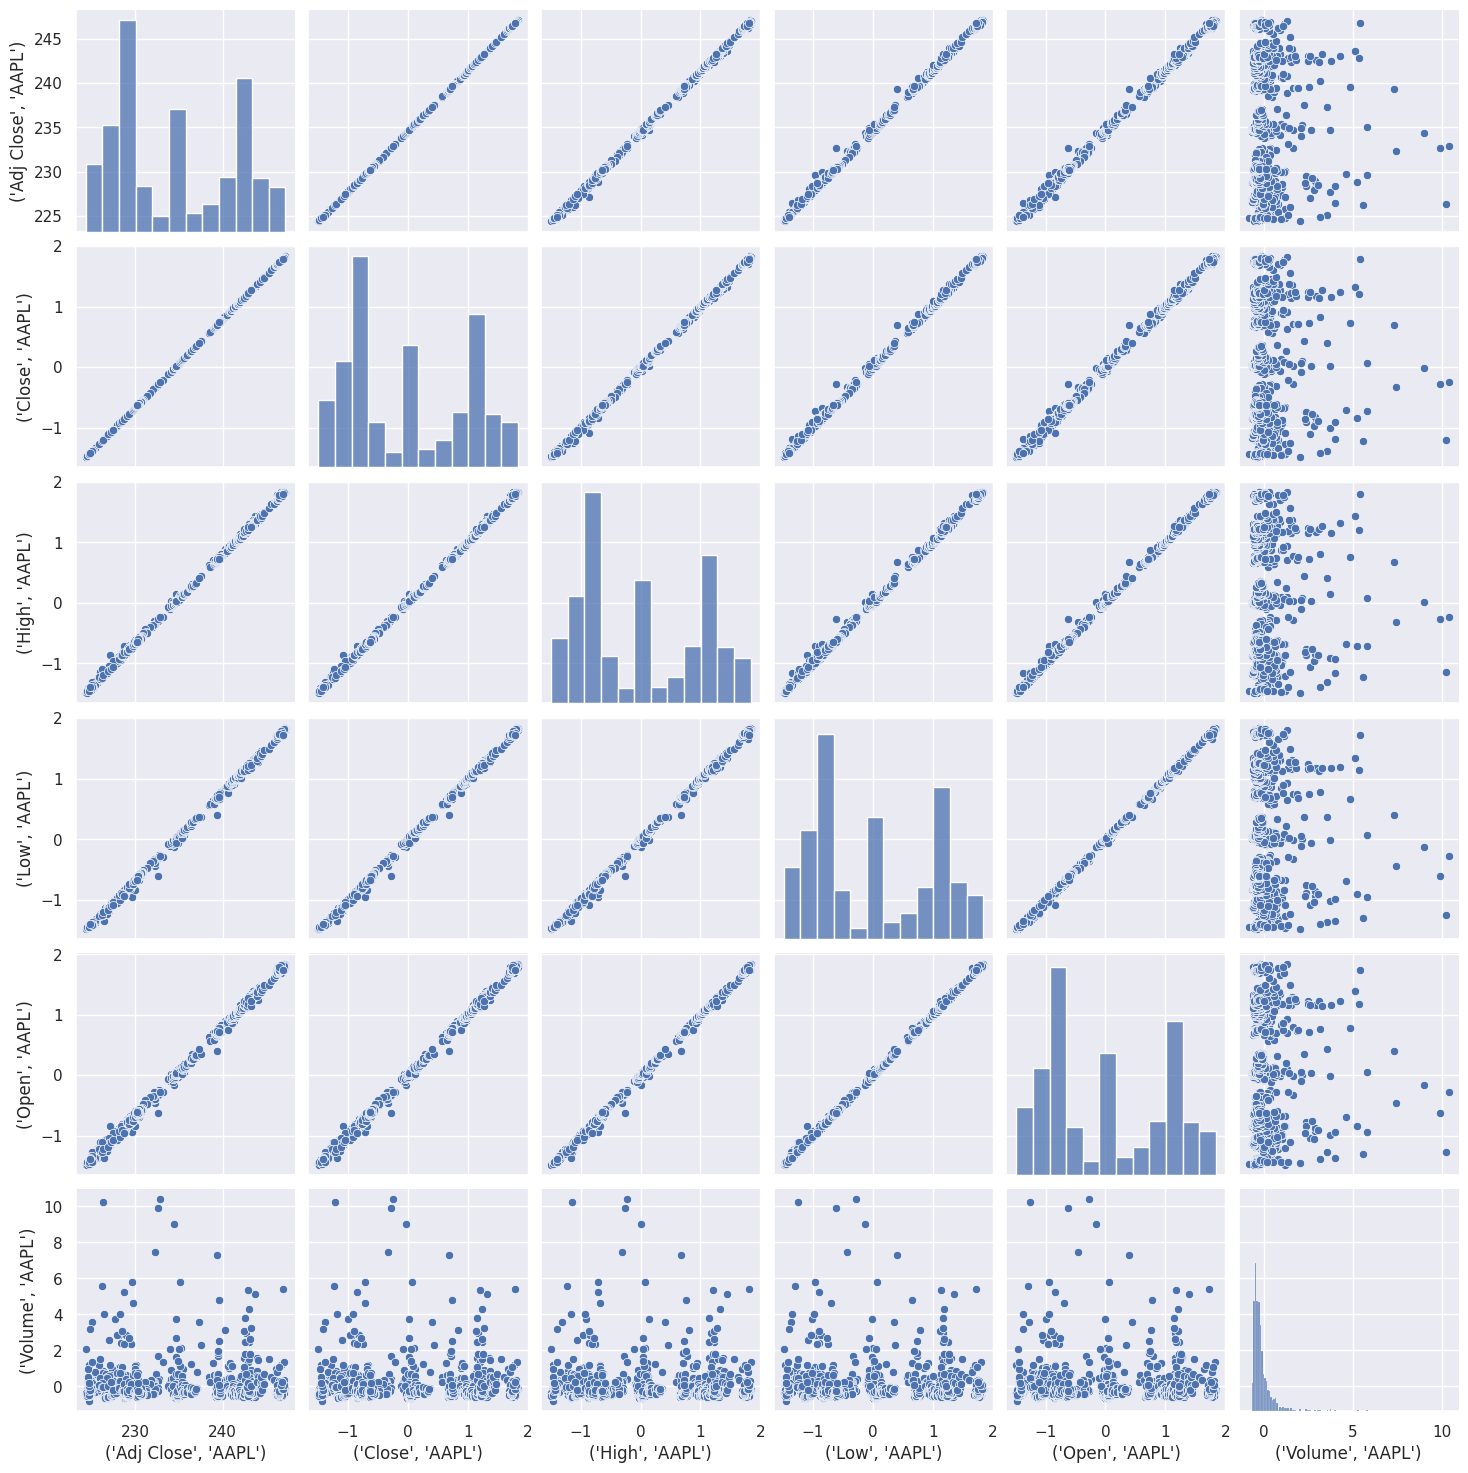

In [8]:
import  matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.pairplot(data)

In [9]:
rolling_window = 20
data['Open_Roll'] = (data['Open'] - data['Open'].rolling(window=rolling_window).mean()) / \
                    data['Open'].rolling(window=rolling_window).std()
data['High_Roll'] = (data['High'] - data['High'].rolling(window=rolling_window).mean()) / \
                    data['High'].rolling(window=rolling_window).std()
data.fillna(method='bfill', inplace=True)

<ipython-input-9-76155a08cb30>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [10]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Open_Roll,High_Roll
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Datetime,,,,,,,,
2024-11-14 14:30:00+00:00,226.210007,-1.226870,-1.218365,-1.299971,-1.300996,5.581898,0.617762,1.224237
2024-11-14 14:35:00+00:00,226.380005,-1.201946,-1.212490,-1.312280,-1.223275,0.820661,0.617762,1.224237
2024-11-14 14:40:00+00:00,225.750000,-1.294313,-1.222772,-1.280921,-1.201280,0.553587,0.617762,1.224237
2024-11-14 14:45:00+00:00,226.039993,-1.251796,-1.256577,-1.266269,-1.290732,0.053354,0.617762,1.224237
2024-11-14 14:50:00+00:00,225.960007,-1.263523,-1.240403,-1.243541,-1.251138,0.321473,0.617762,1.224237


In [11]:
import torch
import torch.nn as nn
import math

import torch
import torch.nn as nn
import math

class TradingTransformer(nn.Module):
    def __init__(self, feature_dim, seq_length, d_model=128, nhead=4, num_layers=2, dropout=0.1):
        super(TradingTransformer, self).__init__()
        self.positional_encoding = nn.Parameter(torch.zeros(1, seq_length, d_model))
        self.input_projection = nn.Linear(feature_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(d_model, 1)

    def forward(self, x):
        batch_size = x.shape[0]
        x = x.reshape(batch_size, 1, -1)
        x = x.repeat(1, self.positional_encoding.shape[1], 1)
        x = self.input_projection(x) + self.positional_encoding
        x = self.transformer_encoder(x)
        x = x[:, -1, :]
        output = self.output_layer(x)
        return output

feature_dim = 7
seq_length = 60

model = TradingTransformer(feature_dim, seq_length)
print(model)


TradingTransformer(
  (input_projection): Linear(in_features=7, out_features=128, bias=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (output_layer): Linear(in_features=128, out_features=1, bias=True)
)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data.drop('Close', axis=1).values, data['Close'].values, test_size=0.2, random_state=42)

In [13]:
from torch.utils.data import DataLoader, TensorDataset
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(-1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
def train_model_fixed(model, train_loader, val_loader, epochs, criterion, optimizer, device):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze(-1)

            optimizer.zero_grad()
            predictions = model(X_batch)

            loss = criterion(predictions, y_batch)
            if torch.isnan(loss):
                print("NaN detected in loss!")
                return

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            train_loss += loss.item()

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze(-1)
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                val_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epochs = 10
learning_rate = 1e-3

model = TradingTransformer(feature_dim, seq_length).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

train_model_fixed(model, train_loader, val_loader, epochs, criterion, optimizer, device)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/10, Train Loss: 3.2975, Val Loss: 0.9507
Epoch 2/10, Train Loss: 1.0326, Val Loss: 1.0006
Epoch 3/10, Train Loss: 1.0576, Val Loss: 0.9492
Epoch 4/10, Train Loss: 0.9997, Val Loss: 1.1787
Epoch 5/10, Train Loss: 1.0227, Val Loss: 0.9826
Epoch 6/10, Train Loss: 0.9801, Val Loss: 1.1891
Epoch 7/10, Train Loss: 0.9242, Val Loss: 1.9552
Epoch 8/10, Train Loss: 1.0419, Val Loss: 1.0471
Epoch 9/10, Train Loss: 0.9373, Val Loss: 1.1565
Epoch 10/10, Train Loss: 0.8867, Val Loss: 0.7475


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
model.eval()
with torch.no_grad():
    predictions = model(torch.tensor(X_val, dtype=torch.float32).to(device))
    predictions = predictions.cpu().numpy()
    mse = mean_squared_error(y_val, predictions)
    mae = mean_absolute_error(y_val, predictions)

print(f"Test MSE: {mse:.4f}, Test MAE: {mae:.4f}")


Test MSE: 1.9213, Test MAE: 1.0317


In [23]:
import pandas as pd
import torch

def predict_new_data(data, model, device, close_mean, close_std):
    new_data = data.copy()

    for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
        new_data[col] = (new_data[col] - new_data[col].mean()) / new_data[col].std()

    rolling_window = 20
    new_data['Open_Roll'] = (new_data['Open'] - new_data['Open'].rolling(window=rolling_window).mean()) / \
                            new_data['Open'].rolling(window=rolling_window).std()
    new_data['High_Roll'] = (new_data['High'] - new_data['High'].rolling(window=rolling_window).mean()) / \
                            new_data['High'].rolling(window=rolling_window).std()

    new_data.fillna(method='bfill', inplace=True)

    new_data_tensor = torch.tensor(new_data.drop('Close', axis=1).values, dtype=torch.float32).to(device)

    model.eval()
    with torch.no_grad():
        predictions = model(new_data_tensor)
    predictions = (predictions.cpu().numpy() * close_std.iloc[0]) + close_mean.iloc[0]
    return predictions

data=yf.download('AAPL',start='2024-12-11',end='2024-12-14',interval='5m')


original_training_data = yf.download('AAPL',start='2024-11-14',end='2024-12-10',interval='5m')
close_mean = original_training_data['Close'].mean()
close_std = original_training_data['Close'].std()

predictions = predict_new_data(data, model, device, close_mean, close_std)

print("Predictions for new data (exact close price):")
print(predictions)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-23-884bfa1391fc>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data.fillna(method='bfill', inplace=True)


Predictions for new data (exact close price):
[[233.92752]
 [234.08572]
 [234.16867]
 [234.23494]
 [234.27104]
 [234.26483]
 [234.26547]
 [234.33072]
 [234.32672]
 [234.31367]
 [234.28764]
 [234.2848 ]
 [234.27316]
 [234.33144]
 [234.32378]
 [234.32788]
 [234.34651]
 [234.37012]
 [234.3995 ]
 [234.43954]
 [234.46602]
 [234.40689]
 [234.43103]
 [234.47696]
 [234.43687]
 [234.36304]
 [234.27907]
 [234.27582]
 [234.26434]
 [234.20763]
 [234.24191]
 [234.25734]
 [234.24243]
 [234.26201]
 [234.26068]
 [234.26616]
 [234.25882]
 [234.23018]
 [234.22781]
 [234.19746]
 [234.16554]
 [234.13031]
 [234.1764 ]
 [234.1821 ]
 [234.14105]
 [234.12115]
 [234.1112 ]
 [234.1236 ]
 [234.11015]
 [234.10817]
 [234.08754]
 [234.02856]
 [233.97171]
 [233.95053]
 [233.86055]
 [233.8395 ]
 [233.91626]
 [233.93904]
 [233.92201]
 [233.9033 ]
 [233.90002]
 [233.90712]
 [233.88678]
 [233.77316]
 [233.69104]
 [233.7011 ]
 [233.7506 ]
 [233.68681]
 [233.63586]
 [233.60603]
 [233.56607]
 [233.5239 ]
 [233.48013]
 [233